In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
np.finfo(np.float)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore', category = DeprecationWarning)
import nltk
from nltk import word_tokenize

In [2]:
pd.set_option('display.max_columns', None)

file = pd.read_csv(r'C:\Users\xuanx\Desktop\Steam_Reviews\steam_reviews.csv')

In [3]:
file['language'].value_counts()[:5]

english      9635437
schinese     3764967
russian      2348900
brazilian     837524
spanish       813320
Name: language, dtype: int64

In [4]:
#pick out english reviews only
df = file[file['language'] == 'english']

In [5]:
print(file)

          Unnamed: 0  app_id                  app_name  review_id  language  \
0                  0  292030  The Witcher 3: Wild Hunt   85185598  schinese   
1                  1  292030  The Witcher 3: Wild Hunt   85185250  schinese   
2                  2  292030  The Witcher 3: Wild Hunt   85185111  schinese   
3                  3  292030  The Witcher 3: Wild Hunt   85184605   english   
4                  4  292030  The Witcher 3: Wild Hunt   85184287  schinese   
...              ...     ...                       ...        ...       ...   
21747366    21747371  546560           Half-Life: Alyx   65645125   english   
21747367    21747372  546560           Half-Life: Alyx   65645115   english   
21747368    21747373  546560           Half-Life: Alyx   65645100   english   
21747369    21747374  546560           Half-Life: Alyx   65645066   english   
21747370    21747375  546560           Half-Life: Alyx   65644930  schinese   

                                                   

In [6]:
df['recommended'].value_counts()

True     8584444
False    1050993
Name: recommended, dtype: int64

In [7]:
#Checking review column for null values and removing them.
print(df.review.isnull().sum())
df1 = df[df.review.isnull()== False]

16750


In [100]:
eagames = df1.groupby(['app_name'])['written_during_early_access'].value_counts()
eagames

app_name                               written_during_early_access
20XX                                   False                           1630
                                       True                             962
A Hat in Time                          False                          24920
A Short Hike                           False                           4201
A Way Out                              False                           4395
                                                                      ...  
Yakuza 0                               False                          19163
Youtubers Life                         False                           3754
                                       True                            2576
theHunter: Call of the Wild™           False                          23344
三国群英传8 Heroes of the Three Kingdoms 8  False                             65
Name: written_during_early_access, Length: 374, dtype: int64

,,written_during_early_access
app_name,written_during_early_access,


In [10]:
game = df1[df1['app_name']=='20XX']
game['written_during_early_access'].value_counts()

False    1630
True      962
Name: written_during_early_access, dtype: int64

In [11]:
games_list = df['app_name'].value_counts().to_frame()
print(games_list.index.to_frame())

                                                                           0
Tom Clancy's Rainbow Six Siege                Tom Clancy's Rainbow Six Siege
Terraria                                                            Terraria
Garry's Mod                                                      Garry's Mod
Grand Theft Auto V                                        Grand Theft Auto V
PLAYERUNKNOWN'S BATTLEGROUNDS                  PLAYERUNKNOWN'S BATTLEGROUNDS
...                                                                      ...
DRAGON QUEST HEROES™ II                              DRAGON QUEST HEROES™ II
Senren＊Banka                                                    Senren＊Banka
Battle Royale Trainer                                  Battle Royale Trainer
三国群英传8 Heroes of the Three Kingdoms 8  三国群英传8 Heroes of the Three Kingdoms 8
Neon Hardcorps                                                Neon Hardcorps

[315 rows x 1 columns]


In [12]:
games_list_20 = games_list.sample(frac=0.03, random_state = 40)
games_list_20.shape

(9, 1)

In [13]:
games_list_20_list = games_list_20.index.tolist()
df_20 = df.loc[(df['app_name'].isin(games_list_20_list))]

In [14]:
df_20.shape

(263815, 23)

In [15]:
df_20['app_name'].value_counts()

ARK: Survival Evolved           184576
Deep Rock Galactic               47002
Assassin's Creed Origins         17832
Avorion                           5056
FAR: Lone Sails                   3834
Titan Souls                       2633
Iconoclasts                       1492
SENRAN KAGURA ESTIVAL VERSUS      1119
Senren＊Banka                       271
Name: app_name, dtype: int64

In [16]:
print(games_list_20_list)

['Avorion', 'Senren＊Banka', 'Iconoclasts', 'FAR: Lone Sails', 'Deep Rock Galactic', 'Titan Souls', "Assassin's Creed Origins", 'SENRAN KAGURA ESTIVAL VERSUS', 'ARK: Survival Evolved']


In [17]:
df_20['recommended'].value_counts()

True     212055
False     51760
Name: recommended, dtype: int64

In [18]:
#df_20_20 = df_20.sample(frac = 0.1)
df_20_20 = df_20.sample(frac = 0.1)
#df_20_20['recommended'].value_counts()
#df_20_20 = df_20

In [19]:
df_20_20.review = df_20_20.review.astype(str)

In [20]:
import string
import re

In [21]:
#Convert text to lowercase and removing punctuation 

def remove_punct(txt):
    text_input = "".join([char for char in txt if char not in string.punctuation])
    return text_input

df_20_20['token_review'] = df_20_20['review'].apply(lambda x: remove_punct(x.lower()))

In [22]:
#remove numbers

def remove_digits(txt):
    return re.sub(r' \d+', '', str(txt))

df_20_20['token_review1'] = df_20_20['token_review'].apply(lambda x: remove_digits(x))

In [23]:
#remove non alphabet characters

def remove_chars(txt):
    return re.sub("[^a-zA-Z]+", ' ', txt)

df_20_20['token_review2'] = df_20_20['token_review1'].apply(lambda x: remove_chars(x))

In [24]:
#Convert reviews into tokens

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

df_20_20['token_review3'] = df_20_20['token_review2'].apply(lambda x: tokenize(x))

In [25]:
#remove stopwords

stopword = nltk.corpus.stopwords.words('english')

def rem_stopwords(txt):
    text = [word for word in txt if word not in stopword]
    return text

df_20_20['token_review4'] = df_20_20['token_review3'].apply(lambda x: rem_stopwords(x))
    

In [26]:
#convert words to base form 
wn = nltk.WordNetLemmatizer()

def lemmatizer(txt):
    text = [wn.lemmatize(word) for word in txt]
    return text

df_20_20['token_review5']=df_20_20['token_review4'].apply(lambda x: lemmatizer(x))

In [27]:
df_20_20['reviews_fin'] = df_20_20['token_review5'].apply(lambda x:' '.join(x))
df_20_20['rec_var'] = df_20_20['recommended'].apply(lambda x: 0 if x==1 else 1)

In [28]:
pos_reviews = df_20_20[df_20_20['rec_var']== 0] #majority variable positive reviews
neg_reviews = df_20_20[df_20_20['rec_var']== 1] #minority variable negative reviews

In [29]:
print(pos_reviews['review'].count(),
    neg_reviews['review'].count())

21164 5218


In [30]:
from nltk.probability import FreqDist

pos_rev_words = pos_reviews['token_review5']
pos_words = []
for reviews in pos_rev_words: 
    pos_words += reviews
    
freqdist_pos = FreqDist(pos_words)
freqdist_pos

FreqDist({'game': 27499, 'fun': 5666, 'good': 5063, 'play': 4750, 'like': 4472, 'get': 3963, 'great': 3804, 'time': 3681, 'one': 3181, '': 3105, ...})

In [31]:
neg_rev_words = neg_reviews['token_review5']
neg_words = []
for reviews in neg_rev_words: 
    neg_words += reviews
    
freqdist_neg = FreqDist(neg_words)
freqdist_neg

FreqDist({'game': 11672, 'get': 2049, 'time': 1960, 'server': 1945, 'like': 1811, 'play': 1730, 'even': 1696, 'dont': 1606, 'hour': 1251, 'still': 1132, ...})

<function matplotlib.pyplot.show(*args, **kw)>

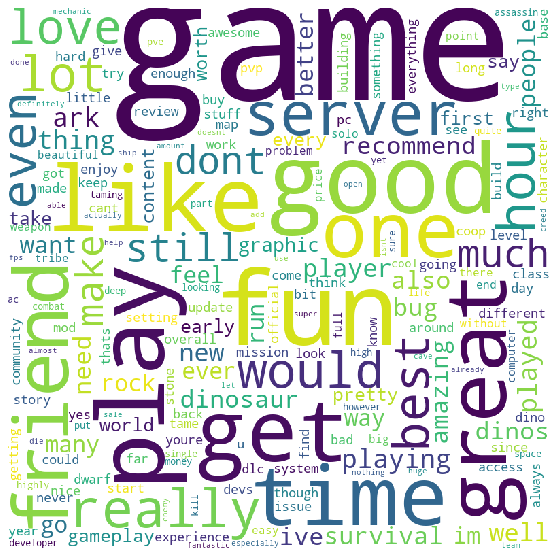

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopword,
                     min_font_size = 10).generate_from_frequencies(freqdist_pos)

plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('postive.png')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

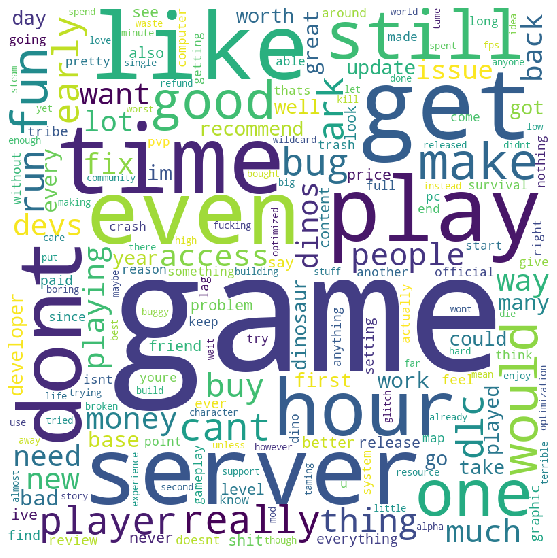

In [33]:
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopword,
                     min_font_size = 10).generate_from_frequencies(freqdist_neg)

plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('negative.png')
plt.show


In [34]:
(pd.Series(nltk.ngrams(pos_words, 2)).value_counts())[:10]

(great, game)       1361
(good, game)        1279
(survival, game)     919
(early, access)      894
(fun, game)          836
(rock, stone)        728
(love, game)         692
(best, game)         674
(game, play)         612
(game, ever)         540
dtype: int64

In [35]:
(pd.Series(nltk.ngrams(pos_words, 3)).value_counts())[:10]

(best, game, ever)          281
(early, access, game)       244
(deep, rock, galactic)      208
(one, best, game)           208
(kgop, kgop, kgop)          193
(game, ever, played)        173
(ive, ever, played)         173
(ark, survival, evolved)    169
(game, ive, ever)           166
(game, play, friend)        156
dtype: int64

In [36]:
(pd.Series(nltk.ngrams(neg_words, 2)).value_counts())[:10]

(early, access)       698
(play, game)          332
(paid, dlc)           261
(trash, trash)        246
(recommend, game)     237
(buy, game)           236
(official, server)    216
(dont, buy)           214
(game, still)         213
(game, game)          175
dtype: int64

In [37]:
(pd.Series(nltk.ngrams(neg_words, 3)).value_counts())[:10]

(trash, trash, trash)       242
(early, access, game)       168
(dlc, early, access)         96
(still, early, access)       87
(game, early, access)        66
(paid, dlc, early)           65
(dont, buy, game)            61
(ark, survival, evolved)     56
(would, recommend, game)     44
(game, still, early)         43
dtype: int64

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [39]:
df_x = df_20_20['reviews_fin']
y = df_20_20['rec_var']
X_train, X_test, y_train, y_test = train_test_split(df_x, y, 
                                                    test_size = 0.2, random_state = 42)


In [40]:
import xgboost

In [41]:
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_features.shape, test_vectors.shape)

(21105, 27824) (5277, 27824)


In [42]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from time import time
from pprint import pprint
import logging
from sklearn.metrics import recall_score, roc_auc_score, make_scorer, roc_curve

Performing Model Optimizations

Estimator: Naive Bayes
Best params are : {'vect__ngram_range': (1, 1)}
Best training AUC score: 0.861
Test set AUC score for best params: 0.861 


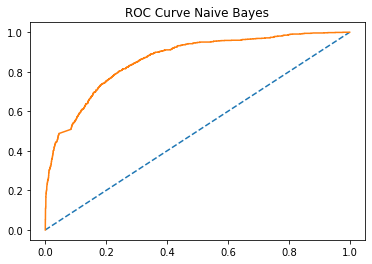


Estimator: Random Forest
Best params are : {'clf__max_depth': 100, 'clf__n_estimators': 600, 'vect__ngram_range': (1, 1)}
Best training AUC score: 0.904
Test set AUC score for best params: 0.904 


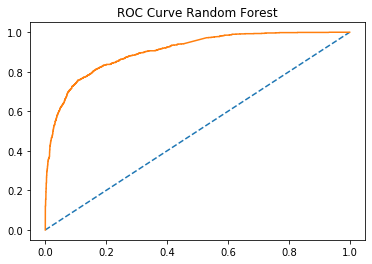


Classifier with best test set AUC: Random Forest


In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

cv = KFold(n_splits=5)


pipe_multi = Pipeline([('vect', TfidfVectorizer()),
                      ('clf', MultinomialNB())])

pipe_rf = Pipeline([('vect', TfidfVectorizer()),
                      ('clf', RandomForestClassifier(random_state = 42))])


grid_params_multi = {'vect__ngram_range': [(1,1), (2,2), (3,3)]
                     }

grid_params_rf = {'vect__ngram_range': [(1,1), (2,2), (3,3)],
                  'clf__max_depth': [10, 20, 50, 100],
                  'clf__n_estimators': [200, 400, 600, 800]
                     }

multiNB = GridSearchCV(estimator = pipe_multi,
                      param_grid = grid_params_multi,
                      scoring = 'roc_auc',
                      cv = cv, 
                       n_jobs = -1)

rf = GridSearchCV(estimator = pipe_rf,
                  param_grid = grid_params_rf,
                  scoring = 'roc_auc',
                  cv = cv, 
                  n_jobs = -1)

grids = [multiNB, rf] #rf

grid_dict = {0: 'Naive Bayes',
            1: 'Random Forest'}

print('Performing Model Optimizations')
best_auc = 0.0
best_clf = 0
best_gs = ''

for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data recall score
    print('Best training AUC score: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred_proba = gs.predict_proba(X_test)[:,1]
    # Test data accuracy of model with best params
    print('Test set AUC score for best params: %.3f ' % roc_auc_score(y_test, y_pred_proba))
    #Plot ROC curve for each estimator
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test,y_pred_proba)
    plt.plot([0,1],[0,1], linestyle ='--')
    plt.plot(fpr, tpr, label = 'auc=%.3f' % auc)
    plt.title(label = 'ROC Curve %s' % grid_dict[idx])
    name = grid_dict[idx]
    plt.savefig(name + ".png")
    plt.show()
    # Track best (highest test auc) model
    if roc_auc_score(y_test, y_pred_proba) > best_auc:
        best_auc = roc_auc_score(y_test, y_pred_proba)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set AUC: %s' % grid_dict[best_clf])




In [44]:
print(rf.best_params_)

{'clf__max_depth': 100, 'clf__n_estimators': 600, 'vect__ngram_range': (1, 1)}


In [45]:
vectorizer = TfidfVectorizer(ngram_range = (1,1))
X_train_vec = vectorizer.fit_transform(X_train)
X_train_vec_df = pd.DataFrame(X_train_vec.toarray())
X_test_vec = vectorizer.transform(X_test)
X_test_vec_df = pd.DataFrame(X_test_vec.toarray())


In [46]:
words = vectorizer.get_feature_names()

In [47]:
X_train_vec_df.columns = words
X_test_vec_df.columns = words

In [48]:
clf = RandomForestClassifier(random_state = 42, max_depth= 100, n_estimators= 800)
clf_fit = clf.fit(X_train_vec_df, y_train)


In [49]:
import shap

In [50]:
from scipy import interpolate
from sklearn import metrics

In [51]:
explainer = shap.TreeExplainer(clf_fit, X_train_vec_df, feature_names = words)
shap_values = explainer(X_test_vec_df)
print(shap_values.values.shape)

100%|===================| 10553/10554 [128:43<00:00]        

(5277, 27824, 2)


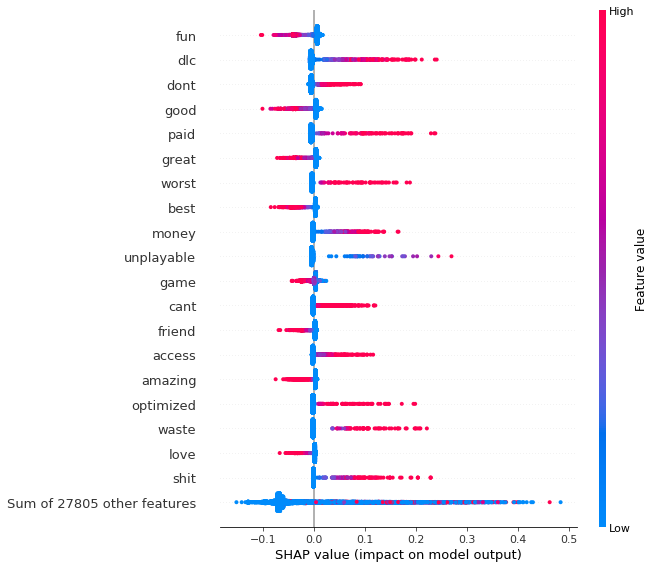

In [52]:
import copy

shap.initjs()
shap_values1 = copy.deepcopy(shap_values)
shap_values1.values = shap_values1.values[:,:,1]
shap_values1.base_values = shap_values1.base_values[:,1]

shap.plots.beeswarm(shap_values1, max_display = 20, show= False)
plt.savefig('beeswarm.png', bbox_inches="tight")

In [53]:
shap.initjs()

ind = 48
print(X_test.iloc[ind], y_test.iloc[ind])

great game let join valguero 0


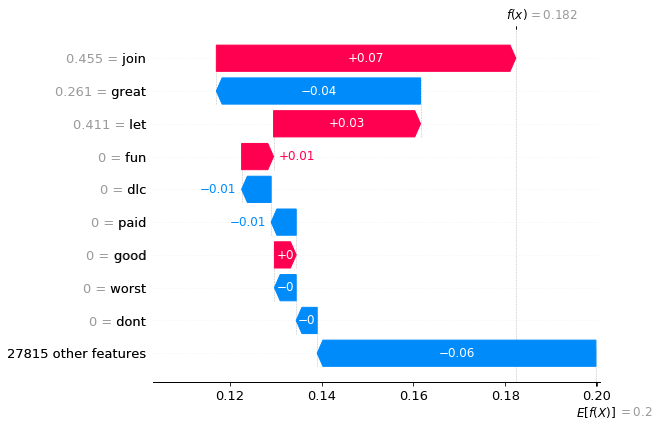

In [54]:
shap.plots.waterfall(shap_values[ind,:,1], show = False)
plt.savefig('waterfall.png', bbox_inches="tight")

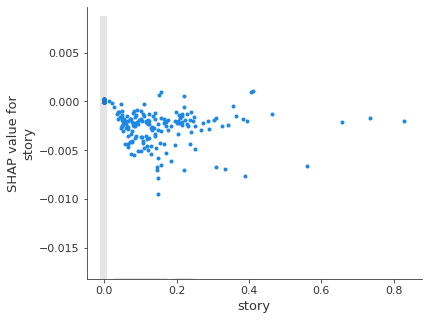

In [55]:
shap.plots.scatter(shap_values[:,words.index('story'),1], show = False)
plt.savefig('scatter.png', bbox_inches="tight")

In [56]:
y_test.value_counts()

0    4189
1    1088
Name: rec_var, dtype: int64

In [57]:
feature_scores = pd.Series(clf_fit.feature_importances_,
                          index = words).sort_values(ascending=False)
feature_scores[:10]


dlc      0.013011
game     0.011563
dont     0.010075
paid     0.010059
fun      0.009782
money    0.009258
shit     0.009182
even     0.008647
cant     0.008210
good     0.008197
dtype: float64

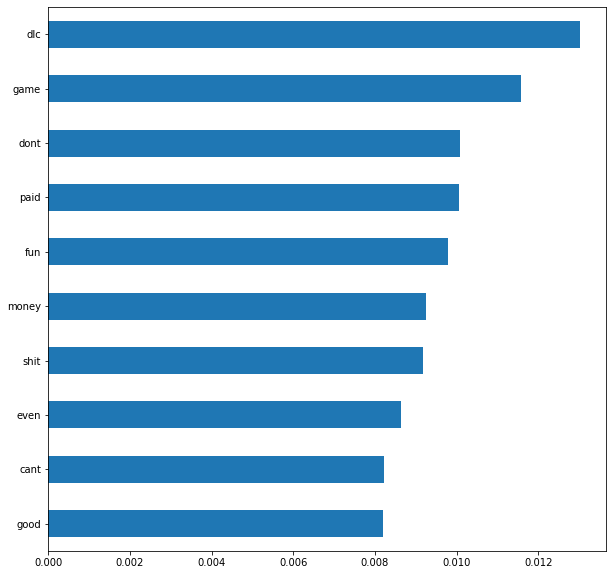

In [58]:
feat_imp = feature_scores.nlargest(10).sort_values(ascending=True)
feat_imp.plot(kind = 'barh', figsize = (10,10))
plt.savefig('feat_imp.png', bbox_inches="tight")

Best Threshold = 0.297444, F-Score = 0.705


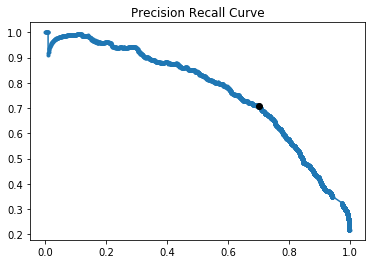

In [59]:
from sklearn.metrics import precision_recall_curve

y_pred_proba = clf_fit.predict_proba(X_test_vec_df)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold = %f, F-Score = %.3f' % (thresholds[ix], fscore[ix]))
plt.plot(recall, precision, label = 'auc=%.3f' % auc, marker = '.')
plt.plot(recall[ix], precision[ix], marker = 'o', color = 'black', label = 'Best')
plt.title(label = 'Precision Recall Curve')
plt.savefig('prec_recall.png', bbox_inches="tight")
plt.show()
optimal_thresh = thresholds[ix]
optimal_prec = precision[ix]

In [60]:
from sklearn.metrics import confusion_matrix

y_pred = (y_pred_proba > optimal_thresh)
conf_mat = confusion_matrix(y_test, y_pred.astype(int), labels = [1,0])
conf_mat

array([[ 764,  324],
       [ 318, 3871]], dtype=int64)

In [61]:
print(X_test.shape)
y_pred_df = y_pred.astype(int)
X_variables = pd.DataFrame(X_test)
X_variables['predictions'] = y_pred_df

(5277,)


In [62]:
negative_reviews = X_variables[X_variables['predictions'] == 1 ]
negative_reviews.head(10)


,reviews_fin,predictions
16636090,grabage finish game ask paid dlc broken beyond...,1
16701706,final update suck game nerfedi played minute f...,1
16597596,server creating system one worst one ever seen...,1
16691385,wait release bug fixing update push paid dlc t...,1
16723691,went succesfully kickstart game complete oppos...,1
16394337,promotion started bought shit wadafuk,1
16408212,cant join friend,1
16533811,devs ban player making video broken aspect gam...,1
16583982,unstable released game already year still bug ...,1
16516630,shit,1


In [63]:
negative_reviews.count()

reviews_fin    1082
predictions    1082
dtype: int64

In [64]:
X_variables.iloc[ind]

reviews_fin    great game let join valguero
predictions                               0
Name: 16528749, dtype: object

## Unused Code For Now

In [65]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [66]:
precision.shape, recall.shape, thresholds.shape

((4169,), (4169,), (4168,))

In [67]:
precision = np.delete(precision, -1)
recall = np.delete(recall, -1)

precision.shape, recall.shape, thresholds.shape

((4168,), (4168,), (4168,))

In [68]:
#locate recall from selected precision

precision_score = optimal_prec
find_recall = interpolate.interp1d(precision, recall)
find_thresh = interpolate.interp1d(precision, thresholds)
thresh_value = find_thresh(precision_score)
recall_score = find_recall(precision_score)
recall_score, thresh_value

(array(0.703125), array(0.29744391))

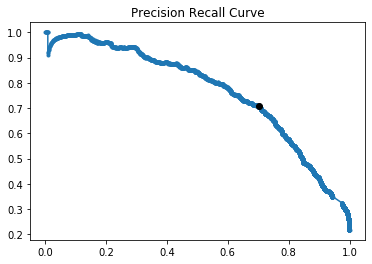

In [69]:
plt.plot(recall, precision, label = 'auc=%.3f' % auc, marker = '.')
plt.plot(recall_score, precision_score, marker = 'o', color = 'black', label = 'Best')
plt.title(label = 'Precision Recall Curve')
plt.show()


In [70]:
tpr_opt = find_tpr(thresh_value)
fpr_opt = find_fpr(thresh_value)
print(tpr_opt, fpr_opt, thresh_value)

NameError: name 'find_tpr' is not defined

In [ ]:
#locating optimal point
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

find_tpr = interpolate.interp1d(thresholds, tpr) #plug in thresholds for tpr
find_fpr = interpolate.interp1d(thresholds, fpr) #plug in thresh for fpr
thresh_look = interpolate.interp1d(tpr, thresholds) #plug in tpr for thresholds


In [ ]:
ttt = thresh_look(0.6) #threshold value for value of tpr
ttt

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)
plt.plot([0,1],[0,1], linestyle ='--')
plt.plot(fpr, tpr, label = 'auc=%.3f' % auc, marker = '.')
plt.plot(fpr_opt, tpr_opt, marker = 'o', color = 'black')
plt.title(label = 'ROC Curve Random Forest Classifier')
plt.show()

In [ ]:
y_pred_opt = (y_pred_proba > ttt)
conf_mat_opt = confusion_matrix(y_test, y_pred_opt, labels = [0,1])
conf_mat_opt

In [ ]:
#find best true negative (tn) results
tn = 7000
best_thresh = 0
for t in high_thresh:
    y_pred_opt = (y_pred_proba > t)
    conf_mat_opt = confusion_matrix(y_test, y_pred_opt, labels = [0,1])
    if conf_mat_opt[1][0] > tn:
        best_thresh = t
        tn = conf_mat_opt[1][0]
        conf_mat_best = conf_mat_opt

best_thresh, tn, conf_mat_best

In [ ]:
high_thresh = thresholds[thresholds > 0.5]
high_thresh

In [ ]:
from sklearn.metrics import accuracy_score

#accuracy prior to choosing threshold
accuracy = accuracy_score(y_test, y_pred_proba.astype('int'))
print(accuracy)

In [ ]:
y_pred = y_pred_proba
y_pred = (y_pred >= opt_thresh).astype('int')

accuracy_thresh = accuracy_score(y_test, y_pred)
print(accuracy_thresh)

In [ ]:
plt.plot(recall, precision, label = 'auc=%.3f' % auc, marker = '.')
plt.plot(0.9, prec_point, marker = 'o', color = 'black', label = 'Best')
plt.title(label = 'Precision Recall Curve')
plt.show()
